<h1>Unsupervised Machine Learning<h1>

---


***Panduan menyelesaikan permasalahan Unsupervised Machine Learning***

# Clustering

### Import Library yang Diperlukan

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage

### Load Dataset

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/jwidjaja02/Exercise_Week_8_Clustering/main/Property%20Dataset%20-%20Clustering.csv")
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34.0,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212.0,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102.0,156.0,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170.0,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    object 
 4   Jumlah Kamar                   307 non-null    int64  
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2

### Data Preparation

In [14]:
# Hapus duplicated data
df.drop_duplicates(keep=False, inplace=True)
df.duplicated().sum()

0

In [13]:
#cek data kosong
df.isna().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

In [19]:
import random
arah = ["Utara","Selatan","Timur","Barat"]
posisi = ["Tusuk Sate","Tikungan/Hook","Tusuk Belakang/Membelakangi Jalan","Kantong Belakang/Ngantong","Standard","Cul De Sac/Ujung Gang Buntu"]
lebar = ["< 1 Mobil","1-2 Mobil","> 2 Mobil"]

df.dropna(subset=["Jumlah Kamar Mandi"],inplace=True)
df.dropna(subset=["Tingkat/Lantai "],inplace=True)
df["Arah Hadap Rumah"] = df['Arah Hadap Rumah'].fillna(random.choice(arah))
df["Posisi Rumah"] = df['Posisi Rumah'].fillna(random.choice(posisi))
df["Lebar Jalan Depan Rumah (ROW)"] = df['Lebar Jalan Depan Rumah (ROW)'].fillna(random.choice(lebar))

df.isna().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [22]:
lb = LabelEncoder()
df['Arah Hadap Rumah'] = lb.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = lb.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = lb.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])
df['Area Category'] = lb.fit_transform(df['Area Category'])
df['Nama Daerah'] = lb.fit_transform(df['Nama Daerah'])
df['Terjual/Belum'] = lb.fit_transform(df['Terjual/Belum'])

#Area Category 0 = Below Standard, 1 = Premium, 2 = Sangat Premium, 3 = Standard
#Terjual/Belum 0 = Belum, 1 = Sudah
#Posisi Rumah 0 = Ujung Gang Buntu, 1 = Ngantong, 2 = Standard, 3 = Tikungan, 4 = Tusuk Belakang, 5 = Tusuk Sate

df=df
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,98,30.0,60.0,2.0,1.0,2.0,287799000,0,2,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000,0,2,2,0


In [23]:
display(df.dtypes)

Area Category                      int64
Nama Daerah                        int64
Luas Tanah (m2)                  float64
Luas Bangunan (m2)               float64
Jumlah Kamar                     float64
Jumlah Kamar Mandi               float64
Tingkat/Lantai                   float64
Harga Penawaran (dari Owner)      object
Terjual/Belum                      int64
Arah Hadap Rumah                   int64
Posisi Rumah                       int64
Lebar Jalan Depan Rumah (ROW)      int64
dtype: object

In [24]:
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].astype(int)
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].astype(int)
df['Jumlah Kamar'] = df['Jumlah Kamar'].astype(int)
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype(int)
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype(int)
df = df[df['Harga Penawaran (dari Owner)'] != " "]

In [27]:
sd_scaler = StandardScaler()
df_scale = sd_scaler.fit_transform(df.to_numpy())
df_scale = pd.DataFrame(df_scale, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
df_scale.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.665464,1.031345,-0.975915,-0.968692,-1.375557,-1.431742,0.318296,-0.569614,0.0,0.144292,-0.836502,-0.051187
1,1.025591,-0.350537,-0.287739,-0.457468,0.447714,0.401214,0.318296,-0.282054,0.0,-0.994854,-2.860298,-1.074923
2,0.128573,-0.350537,-0.204175,-0.085669,0.447714,1.012199,0.318296,-0.234370,0.0,1.283437,-0.836502,-1.074923
3,-0.768446,-0.350537,0.597058,1.540953,0.447714,1.012199,0.318296,-0.007870,0.0,-2.133999,-0.836502,-1.074923
4,-0.768446,-0.350537,1.088612,1.215628,0.447714,1.623184,0.318296,0.683552,0.0,0.144292,-0.836502,-1.074923


In [31]:
kmeans = KMeans(init="random",n_clusters=3,max_iter=300,random_state=42)

model = kmeans.fit_predict(df_scale)
model
df['K-MEANS'] = model
df

<ipython-input-31-6f07d025a686>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['K-MEANS'] = model


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS
1,0,98,30,60,2,1,2,287799000,0,2,2,1,1
2,3,48,170,170,5,4,2,2699999999,0,1,0,0,0
3,2,48,187,250,5,5,2,3100000000,0,3,2,0,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0,0
5,1,48,450,530,5,6,2,10800000000,0,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,47,34,2,1,1,450000000,0,3,4,2,1
304,2,103,300,212,4,4,1,5250000000,0,1,4,2,1
305,1,72,102,156,4,2,2,1950000000,0,1,2,0,1
306,3,103,98,170,4,3,2,1550000000,0,2,2,2,0


C:\Users\JASON\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


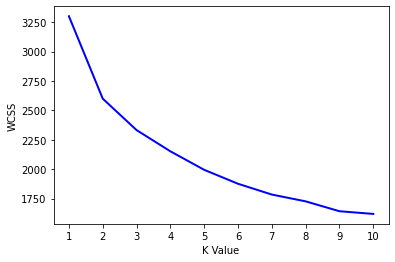

In [33]:
wcss=[]
X2=df_scale

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="random")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)  
    
plt.plot(range(1,11),wcss, linewidth=2, color="blue")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [38]:
kn = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
print('the optimal k is ',kn.knee)

the optimal k is  3


In [40]:
df.groupby('K-MEANS').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
K-MEANS,,,,,,,,,,,,,
0,1,11,202.115108,269.633094,4.791367,3.892086,2.057554,inf,0,1,2,1.071942,139
1,3,11,109.719298,111.061404,2.798246,1.912281,1.535088,inf,0,2,2,0.877193,114
2,2,11,594.872340,646.595745,6.255319,5.191489,1.914894,inf,0,3,4,1.404255,47


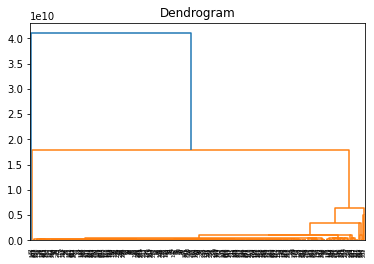

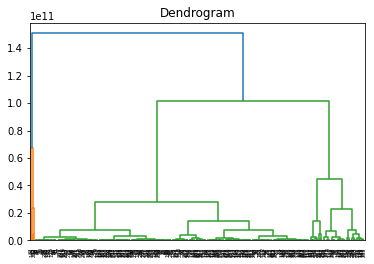

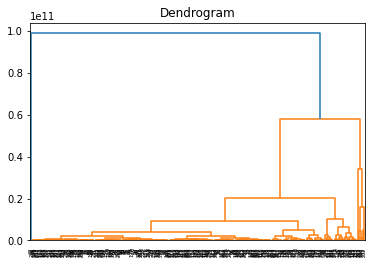

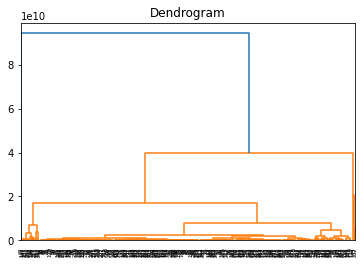

In [49]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(df, method = 'single'))
plt.title('Dendrogram')
plt.show()

import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.show()

import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(df, method = 'complete'))
plt.title('Dendrogram')
plt.show()

import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(df, method = 'average'))
plt.title('Dendrogram')
plt.show()

from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Huh = hc_model.fit_predict(df_scale)

In [55]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Huh = hc_model.fit_predict(df_scale)

In [52]:
df1 = df.copy()
df1['Hierarchical'] = Huh
df1

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS,Hierarchical
1,0,98,30,60,2,1,2,287799000,0,2,2,1,1,0
2,3,48,170,170,5,4,2,2699999999,0,1,0,0,0,2
3,2,48,187,250,5,5,2,3100000000,0,3,2,0,0,2
4,1,48,350,600,5,5,2,5000000000,0,0,2,0,0,1
5,1,48,450,530,5,6,2,10800000000,0,2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,47,34,2,1,1,450000000,0,3,4,2,1,0
304,2,103,300,212,4,4,1,5250000000,0,1,4,2,1,2
305,1,72,102,156,4,2,2,1950000000,0,1,2,0,1,2
306,3,103,98,170,4,3,2,1550000000,0,2,2,2,0,2


In [57]:
df1.groupby('Hierarchical').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

ValueError: Must produce aggregated value